# Analysing the germination rates in fungi-plant mono-association experiments

In [14]:
import pandas as pd
%reload_ext rpy2.ipython

def getFullName(df, col):
    mapping=pd.read_csv('IDmapping.csv',header=None).set_index(0)[1].to_dict()
    mapping['MOCK']='MOCK'
    for i in df.index:
        df.loc[i,col]=mapping[df.loc[i,col]]
    return df

In [15]:
sfw=pd.read_csv('SFW_raw_values.csv').set_index('Unnamed: 0')

df=[]
for plate in set(sfw['plate']):
    dfPlate=sfw[sfw['plate']==plate]
    index=sum(list(dfPlate['weight']))/len(dfPlate)
    df.append({'value':index, 'plate':plate,'treatment':list(dfPlate['treatment'])[0], 'phosphate':list(dfPlate['phosphate'])[0][:2],'replicate':list(dfPlate['replicate'])[0][:8]})
DF=pd.DataFrame(df)

In [16]:
# Drop contaminated fungi
idxToDel=DF[(DF['replicate']=='A') & (DF['treatment'].isin(['9','66','42','83','243']))].index
DF.drop(idxToDel, inplace=True)

idxToDel=sfw[(sfw['replicate']=='A') & (sfw['treatment'].isin(['9','66','42','83','243']))].index
sfw.drop(idxToDel, inplace=True)

# Looking at germination

In [17]:
germ=sfw.drop(columns='weight').drop_duplicates()
for ind in germ.index:
    dfPlate=sfw[sfw['plate']==germ.loc[ind,'plate']]
    germ.loc[ind,'rate']=len(dfPlate[dfPlate['weight']!=0])/len(dfPlate)
germ=getFullName(germ,'treatment')
germLP=germ[germ['phosphate']=='P-']
germHP=germ[germ['phosphate']=='P+']

#### Statistical testing: effect on germination at Low Phosphate

In [18]:
%%R -i germLP -o D
germLP$treatment <- as.factor(germLP$treatment)
library(DescTools)
K=kruskal.test(rate ~ treatment, data = germLP)
D=DunnTest(rate ~ treatment, data = germLP, method='BH')
print(K)


	Kruskal-Wallis rank sum test

data:  rate by treatment
Kruskal-Wallis chi-squared = 168.75, df = 42, p-value < 2.2e-16



In [19]:
print('\n'.join([a for a in str(D).split('\n') if 'MOCK' in a and '*' in a]))
signifPm=[a.split(' ')[0].replace('MOCK-','').replace('-MOCK','') for a in str(D).split('\n') if 'MOCK' in a and '*' in a]

MOCK-Boeremia_exigua_MPI-SDFR-AT-0100                                                        ***
MOCK-Chaetomium_funicola_MPI-SDFR-AT-0129                                                    *  
MOCK-Dactylonectria_macrodidyma_MPI-CAGE-AT-0147                                             *  
MOCK-Fusarium_commune_MPI-SDFR-AT-0072                                                       *  
MOCK-Fusarium_oxysporum_MPI-SDFR-AT-0094                                                     ***
MOCK-Fusarium_redolens_MPI-CAGE-AT-0023                                                      ** 
MOCK-Fusarium_tricinctum_MPI-SDFR-AT-0044                                                    ***
Plectosphaerella_cucumerina_MPI-CAGE-AT-0016-MOCK                                            *  
Plectosphaerella_cucumerina_MPI-SDFR-AT-0117-MOCK                                            ***
Thanatephorus_cucumeris_MPI-SDFR-AT-0096-MOCK                                                ** 
Verticillium_dahliae_MPI-CAGE-

#### Statistical testing: effect on germination at High Phosphate

In [20]:
%%R -i germHP -o D
germHP$treatment <- as.factor(germHP$treatment)
library(DescTools)
K=kruskal.test(rate ~ treatment, data = germHP)
D=DunnTest(rate ~ treatment, data = germHP, method='BH')
print(K)


	Kruskal-Wallis rank sum test

data:  rate by treatment
Kruskal-Wallis chi-squared = 168.63, df = 42, p-value < 2.2e-16



In [21]:
print('\n'.join([a for a in str(D).split('\n') if 'MOCK' in a and '*' in a]))
signifPp=[a.split(' ')[0].replace('MOCK-','').replace('-MOCK','') for a in str(D).split('\n') if 'MOCK' in a and '*' in a]

MOCK-Boeremia_exigua_MPI-SDFR-AT-0100                                                        ***
MOCK-Cylindrocarpon_olidum_MPI-CAGE-CH-0241                                                  ** 
MOCK-Dactylonectria_estremocensis_MPI-CAGE-AT-0021                                           ** 
MOCK-Dactylonectria_macrodidyma_MPI-CAGE-AT-0147                                             ** 
MOCK-Fusarium_commune_MPI-SDFR-AT-0072                                                       ** 
MOCK-Fusarium_redolens_MPI-CAGE-AT-0023                                                      ** 
MOCK-Fusarium_tricinctum_MPI-SDFR-AT-0044                                                    ***
MOCK-Leotiomycetes_sp._MPI-SDFR-AT-0126                                                      *  
Neonectria_radicicola_MPI-CAGE-AT-0134-MOCK                                                  *  
Plectosphaerella_cucumerina_MPI-CAGE-AT-0016-MOCK                                            ***
Plectosphaerella_cucumerina_MP

#### Figure

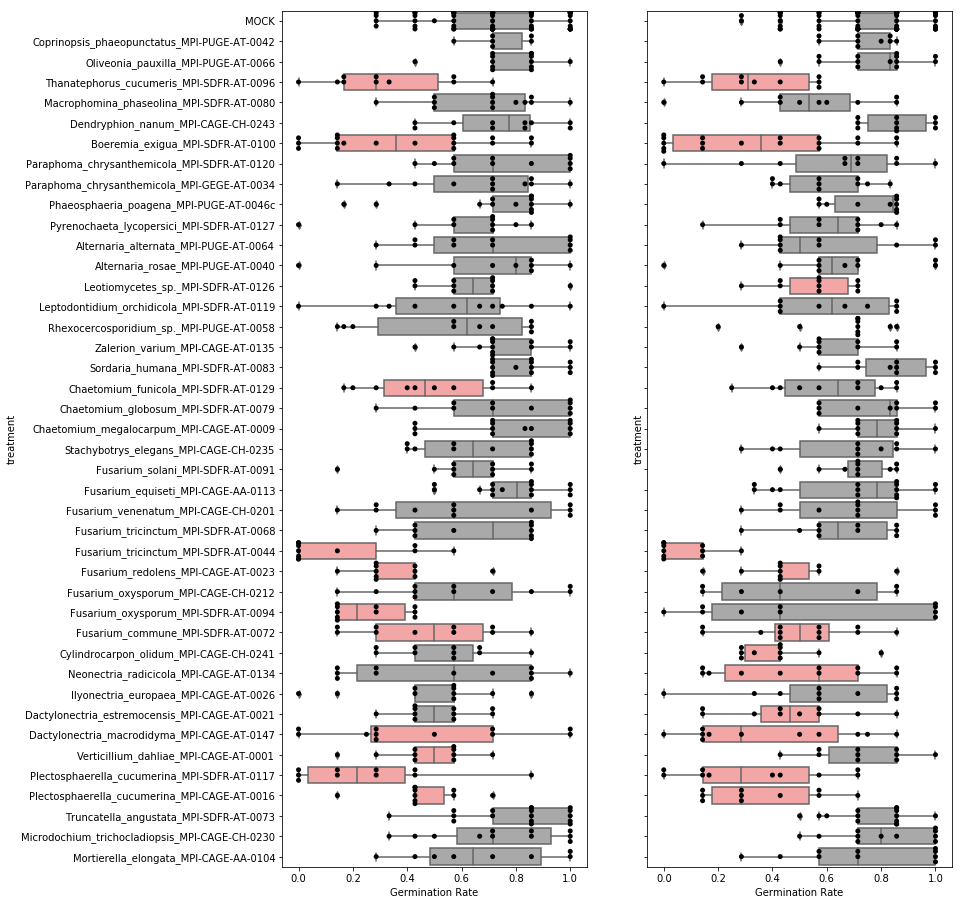

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 
order=['MOCK','Coprinopsis_phaeopunctatus_MPI-PUGE-AT-0042','Oliveonia_pauxilla_MPI-PUGE-AT-0066','Thanatephorus_cucumeris_MPI-SDFR-AT-0096','Macrophomina_phaseolina_MPI-SDFR-AT-0080','Dendryphion_nanum_MPI-CAGE-CH-0243','Boeremia_exigua_MPI-SDFR-AT-0100','Paraphoma_chrysanthemicola_MPI-SDFR-AT-0120','Paraphoma_chrysanthemicola_MPI-GEGE-AT-0034','Phaeosphaeria_poagena_MPI-PUGE-AT-0046c','Pyrenochaeta_lycopersici_MPI-SDFR-AT-0127','Alternaria_alternata_MPI-PUGE-AT-0064','Alternaria_rosae_MPI-PUGE-AT-0040','Leotiomycetes_sp._MPI-SDFR-AT-0126','Leptodontidium_orchidicola_MPI-SDFR-AT-0119','Rhexocercosporidium_sp._MPI-PUGE-AT-0058','Zalerion_varium_MPI-CAGE-AT-0135','Sordaria_humana_MPI-SDFR-AT-0083','Chaetomium_funicola_MPI-SDFR-AT-0129','Chaetomium_globosum_MPI-SDFR-AT-0079','Chaetomium_megalocarpum_MPI-CAGE-AT-0009','Stachybotrys_elegans_MPI-CAGE-CH-0235','Fusarium_solani_MPI-SDFR-AT-0091','Fusarium_equiseti_MPI-CAGE-AA-0113','Fusarium_venenatum_MPI-CAGE-CH-0201','Fusarium_tricinctum_MPI-SDFR-AT-0068','Fusarium_tricinctum_MPI-SDFR-AT-0044','Fusarium_redolens_MPI-CAGE-AT-0023','Fusarium_oxysporum_MPI-CAGE-CH-0212','Fusarium_oxysporum_MPI-SDFR-AT-0094','Fusarium_commune_MPI-SDFR-AT-0072','Cylindrocarpon_olidum_MPI-CAGE-CH-0241','Neonectria_radicicola_MPI-CAGE-AT-0134','Ilyonectria_europaea_MPI-CAGE-AT-0026','Dactylonectria_estremocensis_MPI-CAGE-AT-0021','Dactylonectria_macrodidyma_MPI-CAGE-AT-0147','Verticillium_dahliae_MPI-CAGE-AT-0001','Plectosphaerella_cucumerina_MPI-SDFR-AT-0117','Plectosphaerella_cucumerina_MPI-CAGE-AT-0016','Truncatella_angustata_MPI-SDFR-AT-0073','Microdochium_trichocladiopsis_MPI-CAGE-CH-0230','Mortierella_elongata_MPI-CAGE-AA-0104']
germLP=germLP.rename(index=str, columns={'replicate':'Replicate','rate':'Germination Rate'})
germHP=germHP.rename(index=str, columns={'replicate':'Replicate','rate':'Germination Rate'})

paletteLoP={}
paletteHiP={}
for f in order:
    if f=='.MOCK':
        paletteLoP[f]='WhiteSmoke'
        paletteHiP[f]='WhiteSmoke'
    else:
        if f in signifPp:
            paletteHiP[f]='#ff9999'
        else:
            paletteHiP[f]='#A9A9A9'
        if f in signifPm:
            paletteLoP[f]='#ff9999'
        else:
            paletteLoP[f]='#A9A9A9'

f, axes = plt.subplots(1, 2, figsize=(12,15.75), sharey=True)
sns.set_style("white")
sns.boxplot(y='treatment',x='Germination Rate', data=germLP, order=order,ax=axes[0], palette=paletteLoP)
sns.swarmplot(y='treatment',x='Germination Rate', data=germLP, order=order, ax=axes[0],color='black')#, hue='Replicate', hue_order=['Melanie1','Melanie2','Melanie3','A','B','RNAseq'],ax=axes[0])
sns.boxplot(y='treatment',x='Germination Rate', data=germHP, order=order, ax=axes[1], palette=paletteHiP)
sns.swarmplot(y='treatment',x='Germination Rate', data=germHP, order=order, ax=axes[1],color='black')# hue='Replicate', hue_order=['Melanie1','Melanie2','Melanie3','A','B','RNAseq']

#plt.savefig('germFigure.pdf')